## Lesson 3 - Decision Trees

In [8]:
import sys
from time import time
sys.path.append("../tools/")
sys.path.append("../naive bayes/")
from prep_terrain_data import makeTerrainData

import matplotlib as pl
font_cache_path = pl.get_cachedir() + '/fontList.cache'
%rm $font_cache_path

from class_vis import prettyPicture, output_image



%matplotlib inline

rm: /Users/omojumiller/.matplotlib/fontList.cache: No such file or directory


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [10]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [11]:
from sklearn import tree


#features_train = features_train[:len(features_train)/100] 
#labels_train = labels_train[:len(labels_train)/100]

features_train, labels_train, features_test, labels_test = makeTerrainData()

#parameters = {'kernel':('linear', 'rbf'), 'C':[10, 100, 1000, 10000]}
clf = tree.DecisionTreeClassifier()
t0 = time()
clf.fit(features_train, labels_train)
print("done in %0.3fs" % (time() - t0))


done in 0.002s


In [12]:
##############################################################
def submitAcc():
    return clf.score(features_test, labels_test)

In [13]:
pred = clf.predict(features_test)
print "Classifier with accurancy %.2f%%" % (submitAcc() * 100)




Classifier with accurancy 91.20%


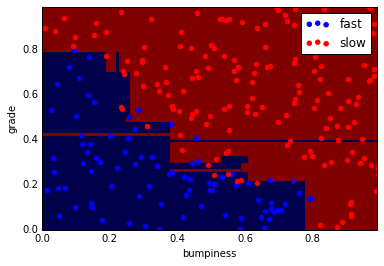

In [14]:
prettyPicture(clf, features_test, labels_test)

This decision tree seems to be overfitting the data. Lets plot the training points instead of the test points to explore what is going on.

In [ ]:
prettyPicture(clf, features_train, labels_train)

### Tweak parameters
We will tweak ```min_sample_split``` parameter so we can adjust our classifier to not overfit. This gives us the minimum number of samples that must be in a population inorder to split it.

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=50)
t0 = time()
clf.fit(features_train, labels_train)
print("done in %0.3fs" % (time() - t0))

In [ ]:
pred = clf.predict(features_test)
print "Classifier with accurancy %.2f%%" % (submitAcc() * 100)
prettyPicture(clf, features_test, labels_test)

## Decision Tree Mini Project

In [ ]:
from email_preprocess import preprocess

In [ ]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#### Part 1: Get the Decision Tree Running
Get the decision tree up and running as a classifier, setting ```min_samples_split=40```.  ** It will probably take a while to train.**  What’s the accuracy?

#### Answer
Accuracy of the classifier is **97.90%**


In [ ]:
from sklearn import tree

def submitAcc():
    return clf.score(features_test, labels_test)


clf = tree.DecisionTreeClassifier(min_samples_split=40)
t0 = time()
clf.fit(features_train, labels_train)
print("done in %0.3fs" % (time() - t0))



pred = clf.predict(features_test)
print "Classifier with accurancy %.2f%%" % (submitAcc() * 100)

#### Part 2: Speed It Up
You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm.  A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly.  

Another way to control the complexity of an algorithm is via the number of features that you use in training/testing.  The more features the algorithm has available, the more potential there is for a complex fit.  We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

- find the number of features in your data.  The data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like ```len(features_train[0])```



In [ ]:
print "Number of data points in the data %d" % len(features_train)
print "Number of features in the data %d " % len(features_train[3])

Go into tools/email_preprocess.py, and find the line of code that looks like this:     
```selector = SelectPercentile(f_classif, percentile=1)``` Change percentile from 10 to 1.

What’s the number of features now?
#### Answer
- 379 

In [ ]:
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess

In [ ]:
features_train, features_test, labels_train, labels_test = preprocess()

In [ ]:
print "Number of data points in the data %d" % len(features_train)
print "Number of features in the data %d " % len(features_train[3])


What do you think ```SelectPercentile``` is doing?  Would a large value for percentile lead to a more complex or less complex decision tree, all other things being equal?

#### Answer
 - I think a large value for percentile would lead to a more complex decision tree. 
 
Note the difference in training time depending on the number of features.  

#### Answer
- training time went down significantly with less features.

What’s the accuracy when percentile = 1?

#### Answer
- Accuracy of the prediction with ```percentile = 1 ``` is **96.70%**

In [ ]:
from sklearn import tree

def submitAcc():
    return clf.score(features_test, labels_test)


clf = tree.DecisionTreeClassifier(min_samples_split=40)
t0 = time()
clf.fit(features_train, labels_train)
print("done in %0.3fs" % (time() - t0))



pred = clf.predict(features_test)
print "Classifier with accurancy %.2f%%" % (submitAcc() * 100)